In [52]:
from get_quantum_nums import get_quantum_numbers
import hadron
import openparticle as op
import numpy as np
import matplotlib.pyplot as plt

In [53]:
g = 1
L = 100
mg = 1

mq = 1.0

In [54]:
K = 2
Lambda_perp = 0
P_perp = 0

In [55]:
qnums = get_quantum_numbers(K, Lambda_perp)
qnums

,Helicity,n,n⟂
0,+1,0.5,0
1,+1,1.0,0
2,+1,1.5,0
3,+1,2.0,0
4,-1,0.5,0
5,-1,1.0,0
6,-1,1.5,0
7,-1,2.0,0


In [56]:
pion = hadron.Hadron('meson', K)
pion.display()

<IPython.core.display.Latex object>

In [57]:
pion_fock = pion.get_states(K, P_perp, Lambda_perp)
pion_fock.display()

<IPython.core.display.Latex object>

In [58]:
def pplus(n):
    return 2 * np.pi * n / L

In [59]:
def Coeff_iG(q1, q2, q3, q4):
    n1, n2 = qnums.iloc[q1]['n'], qnums.iloc[q2]['n'] 
    n3, n4 = qnums.iloc[q3]['n'], qnums.iloc[q4]['n']

    h1, h2 = qnums.iloc[q1]['Helicity'], qnums.iloc[q2]['Helicity'] 
    h3, h4 = qnums.iloc[q3]['Helicity'], qnums.iloc[q4]['Helicity']
    return round(4/((pplus(n1) - pplus(n4))**2 + mg**2) * np.sqrt(pplus(n1) * pplus(n2) *\
                       pplus(n3) * pplus(n4)) * (h1 == h4) * (h2 == h3), 5)
    

In [60]:
H_iG = op.ParticleOperatorSum([])

for i in range(len(qnums)):
    for j in range(len(qnums)):
        for k in range(len(qnums)):
            for l in range(len(qnums)):
                if qnums.iloc[i]['n'] % 1 == 0.5 and qnums.iloc[j]['n'] % 1 == 0.5 and qnums.iloc[k]['n'] % 1 == 0.5 and qnums.iloc[l]['n'] % 1 == 0.5:
                    c = Coeff_iG(i, j, k, l)
                    op_st = 'b' + str(i) + '^ ' +\
                        'd' + str(j) + '^ ' +\
                        'd' + str(k) + ' ' +\
                        'b' + str(l)
                    H_iG += (-g**2) * Coeff_iG(i, j, k, l) * op.ParticleOperator(op_st)
if isinstance(H_iG, op.ParticleOperatorSum):
    H_iG = H_iG.cleanup()


In [61]:
H_free = op.ParticleOperatorSum([])

for i in range(len(qnums)):
    if qnums.iloc[i]['n'] % 1 == 0.5:
        op_st_f = 'b' + str(i) + "^ " + 'b' + str(i) 
        op_st_af = 'd' + str(i) + "^ " + 'd' + str(i) 
        x = qnums.iloc[i]['n'] / K
        coeff = mq**2 / x
        H_free += coeff * op.ParticleOperator(op_st_f) + coeff * op.ParticleOperator(op_st_af)

H_free = H_free.cleanup()

In [62]:
H_free.display()

<IPython.core.display.Latex object>

In [63]:
H_iG.display()

<IPython.core.display.Latex object>

In [64]:
H = H_free + H_iG

In [65]:
H.display()

<IPython.core.display.Latex object>

In [66]:
basis=pion_fock.states_list

In [67]:
size = (len(basis), len(basis))
matrix = np.zeros(size)

for i, state_i in enumerate(basis):
    for j, state_j in enumerate(basis):
        matrix_element = state_i.dagger() * H * state_j
        matrix[i][j] = matrix_element

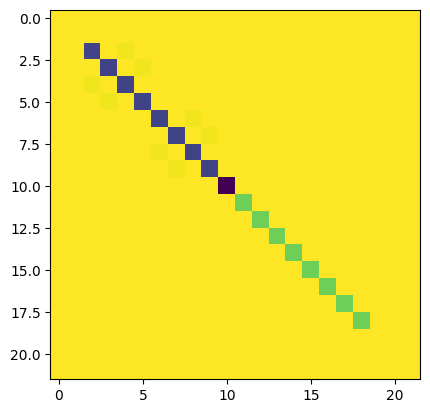

In [68]:
plt.imshow(matrix)

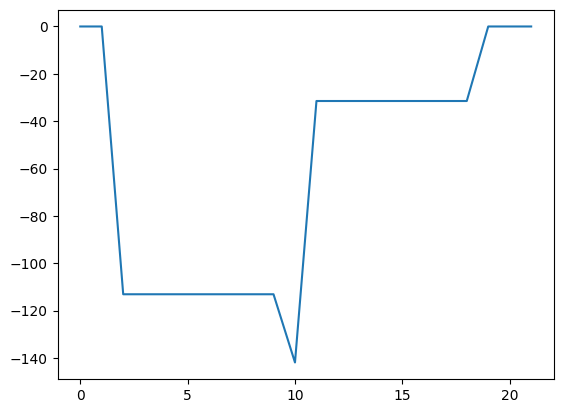

In [69]:
plt.plot(np.diagonal(matrix))

In [70]:
matrix[np.nonzero(matrix - np.diag(np.diagonal(matrix)))]

array([-2.92589, -2.92589, -2.92589, -2.92589, -2.92589, -2.92589,
       -2.92589, -2.92589])

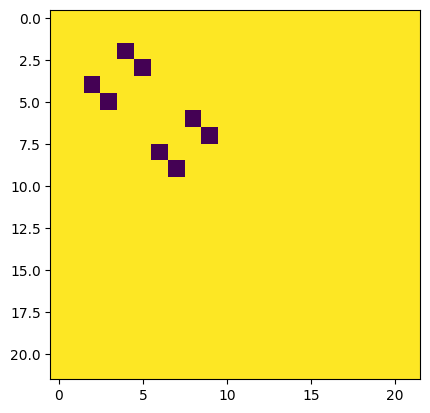

In [71]:
plt.imshow(matrix - np.diag(np.diagonal(matrix)))

In [72]:
np.count_nonzero(matrix - np.diag(np.diagonal(matrix)))

8

In [73]:
np.linalg.eigh(matrix)

(array([-141.91368   , -116.02780667, -116.02780667, -116.02780667,
        -116.02780667, -110.17602667, -110.17602667, -110.17602667,
        -110.17602667,  -31.47842   ,  -31.47842   ,  -31.47842   ,
         -31.47842   ,  -31.47842   ,  -31.47842   ,  -31.47842   ,
         -31.47842   ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.        ,  0.        ,  0.  